In [1]:
import os
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Flatten, Dense, Dropout
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
generator = image.ImageDataGenerator(horizontal_flip=True, rotation_range=10, shear_range=.1)

In [3]:
gen = generator.flow_from_directory("datasets/grocery/GroceryStoreDataset-master/dataset/train/Fruit/", target_size=(200, 200), batch_size=32)

Found 21340 images belonging to 19 classes.


In [4]:
#input_shape=(200, 200, 3) classes=2
resnet_mod = ResNet50(include_top=False, weights='imagenet',input_shape=(200, 200, 3))
#ResNet50?

In [1]:
flat = Flatten()(resnet_mod.output)
d1 = Dense(500, activation="relu") (flat)
d2 = Dense(100, activation="tanh") (d1)
d3 = Dense(20, activation="tanh") (d2)
dr = Dropout(p=0.3)(d3) 
d4 = Dense(100, activation="tanh") (dr)
d5 = Dense(20, activation="tanh") (d4)
dr2 = Dropout(p=0.3)(d5) 
d6 = Dense(10, activation="tanh") (dr2)
out = Dense(19, activation="softmax") (d6)

NameError: name 'Flatten' is not defined

In [6]:
model = Model(input=[resnet_mod.input], output=[out])
#Model?

In [7]:
for layer in resnet_mod.layers:
  layer.trainable = False

In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 200, 200, 3)   0                                            
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 206, 206, 3)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 100, 100, 64)  9472        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 100, 100, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
model.fit_generator(gen,samples_per_epoch=10,nb_epoch=10)
#steps_per_epoch=10
#model.fit_generator?

Epoch 1/10


In [15]:
model.evaluate_generator(gen, val_samples=10)

[2.1358296871185303, 0.40625]

In [48]:
images, vals = gen.next()

In [49]:
evals = model.predict(images)

In [50]:
res = np.argmax(evals, axis=1)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


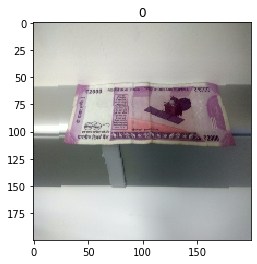

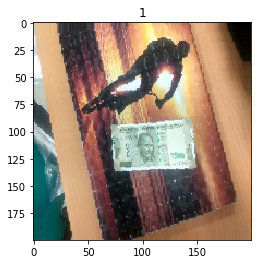

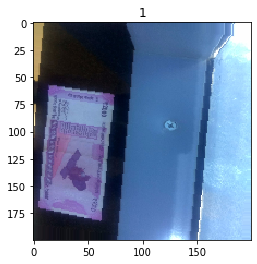

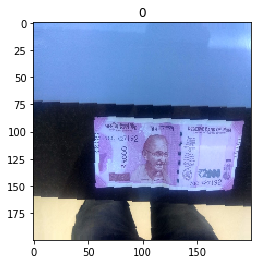

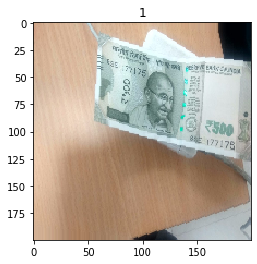

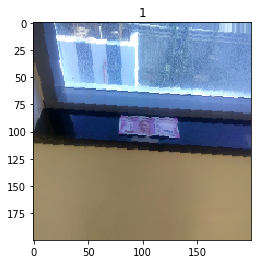

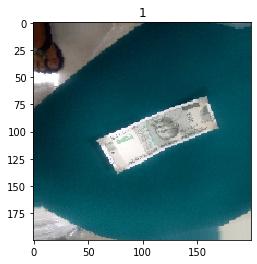

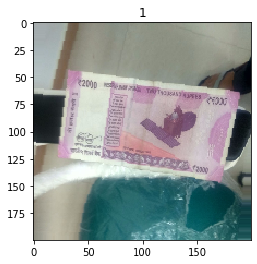

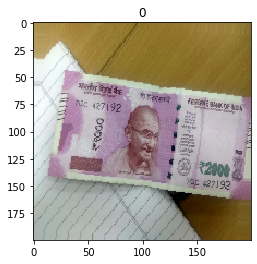

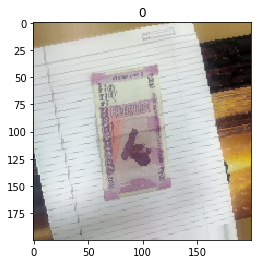

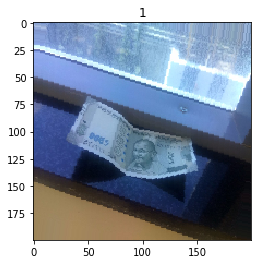

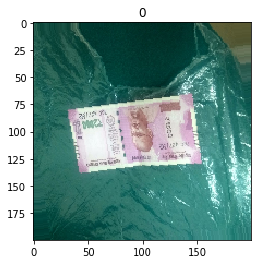

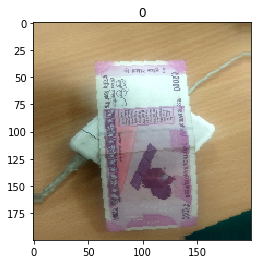

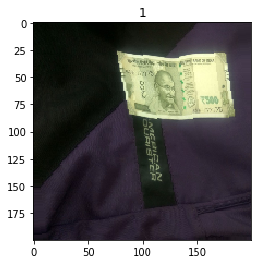

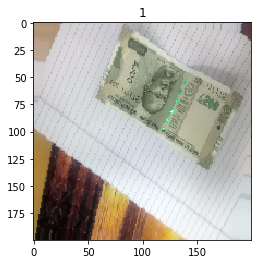

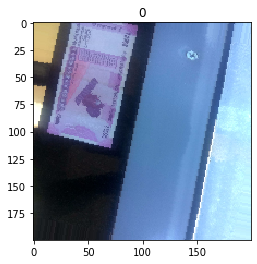

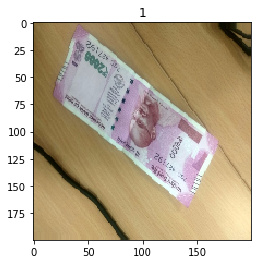

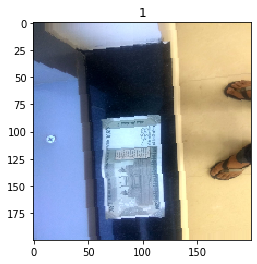

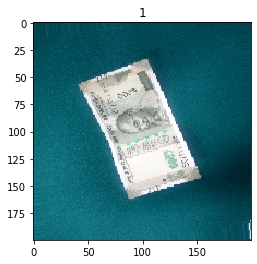

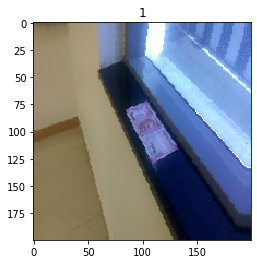

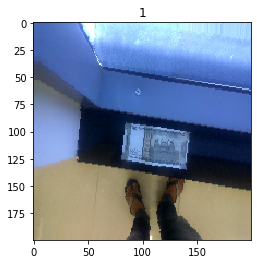

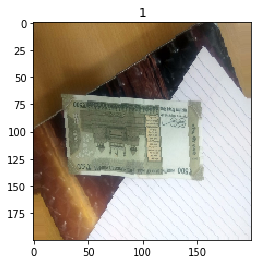

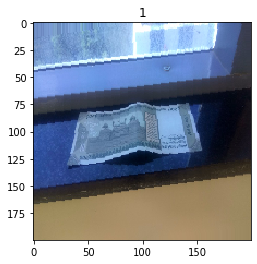

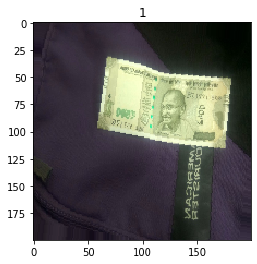

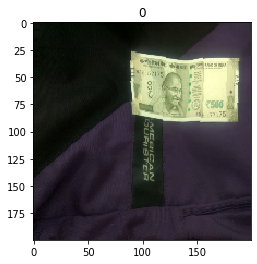

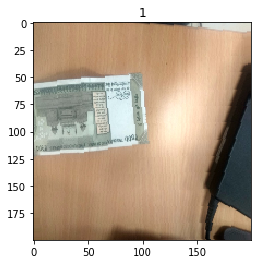

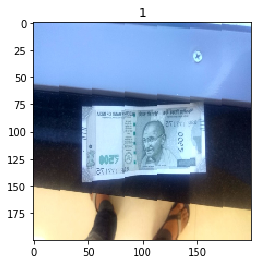

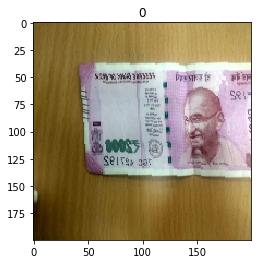

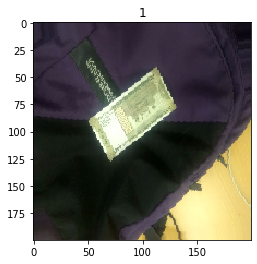

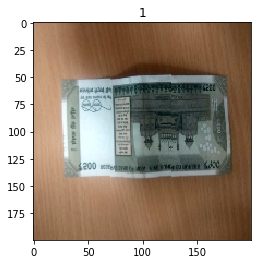

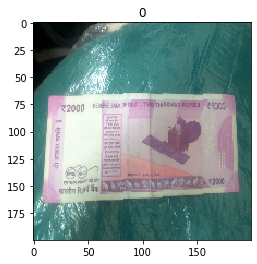

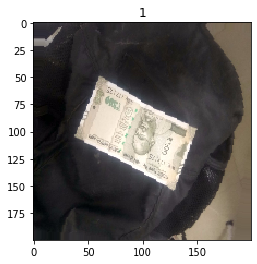

In [51]:
for img, ev in zip(images, res):
  plt.figure()
  plt.title(str(ev))
  plt.imshow(img/255)

In [52]:
gen.class_indices

{'2000': 0, '500': 1}

In [53]:
model.save_weights("model.h5")